<p> <font size = "+2" color="orange"> Pyber </font></p>
<p> Anais Dotis-Georgiou </p>
<p> 11/11/17 </p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path_one = "Raw_Data/city_data.csv"
file_path_two = "Raw_Data/ride_data.csv"
city = pd.read_csv(file_path_one)
ride = pd.read_csv(file_path_two)

In [3]:
city.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
ride.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
merged = ride.merge(city, on="city", how="outer")
merged.head()


,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


<p> <font size = "+2"> Bubble Plot of Ride Sharing Data </font> </p>

In [6]:
drop_merge = merged.drop_duplicates('city', inplace=False)
driver = pd.DataFrame(drop_merge.groupby("city")["driver_count"].sum())
driver = driver.reset_index()
fare = pd.DataFrame(merged.groupby("city")["fare"].sum())
fare = fare.reset_index()
fare_count = pd.DataFrame(merged.groupby("city")["fare"].count())
fare_count = fare_count.reset_index()
avg_fare = pd.DataFrame(round(fare.fare/fare_count.fare,2))

rides = pd.DataFrame(merged.groupby("city")["ride_id"].count())
rides = rides.reset_index()
ctype = pd.DataFrame(merged.groupby("city")["type"].max())
ctype = ctype.reset_index()
bub = driver.merge(avg_fare, left_index = True, right_index = True)
ble = rides.merge(ctype, on = "city")
bubble = bub.merge(ble, on= "city")
bubble.head()


,city,driver_count,fare,ride_id,type
0,Alvarezhaven,21,23.93,31,Urban
1,Alyssaberg,67,20.61,26,Urban
2,Anitamouth,16,37.32,9,Suburban
3,Antoniomouth,21,23.62,22,Urban
4,Aprilchester,49,21.98,19,Urban


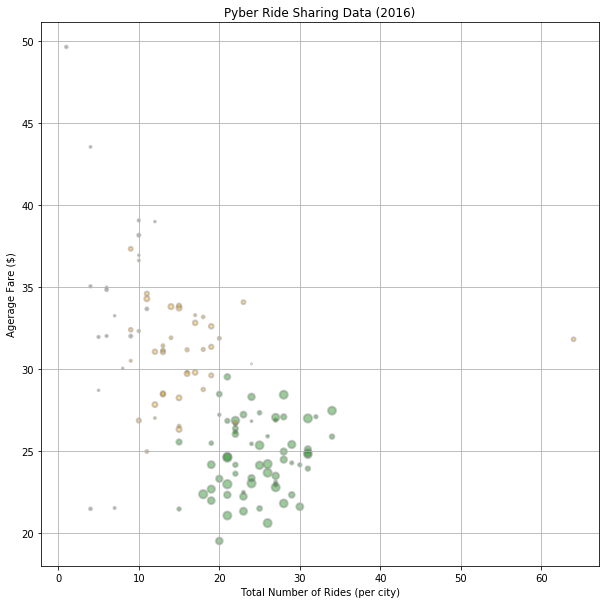

In [7]:
x_axis = bubble["ride_id"]
y_axis = bubble["fare"]
s = bubble["driver_count"]
ctype["color"] = ctype["type"].map(lambda x: 'orange' if x == "Suburban" else 'green' if x== "Urban" else 'gray' )
c = ctype["color"]
plt.figure(figsize=(10,10))
plt.scatter(x_axis, y_axis, s = s, c=c, alpha=0.4, edgecolors="grey", linewidth=2)
plt.grid()
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel('Agerage Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.show()

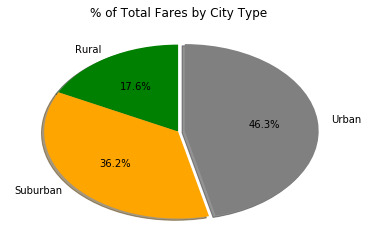

,fare
type,
Rural,615.72
Suburban,1268.64
Urban,1623.89


In [11]:
x = pd.DataFrame(bubble.groupby("type")["fare"].sum())
labels = ["Rural", "Suburban", "Urban"]
colors = ['green', 'orange', 'gray']
expload = [0, 0, 0.05]
plt.pie(x, explode = expload, labels = labels, colors=colors, shadow=True, autopct="%1.1f%%", startangle=90)
plt.title('% of Total Fares by City Type')
plt.show()
x

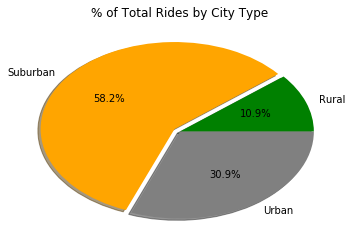

In [9]:
x = pd.DataFrame(bubble.groupby("type")["ride_id"].max())
labels = ["Rural", "Suburban", "Urban"]
colors = ['green', 'orange', 'gray']
expload = [0, 0.05, 0]
plt.pie(x, explode = expload, labels = labels, colors=colors, shadow=True, autopct="%1.1f%%")
plt.title('% of Total Rides by City Type')
plt.show()


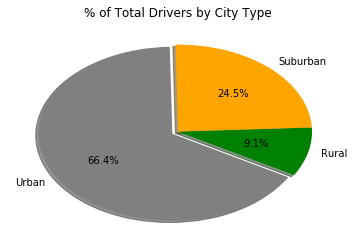

In [10]:
x = pd.DataFrame(bubble.groupby("type")["driver_count"].max())
labels = ["Rural", "Suburban", "Urban"]
colors = ['green', 'orange', 'gray']
expload = [0, 0, 0.05]
plt.pie(x, explode = expload, labels = labels, colors=colors, shadow=True, autopct="%1.1f%%", startangle=-30 )
plt.title('% of Total Drivers by City Type')
plt.show()

<p> <font color='orange' size=+2 > Conclusions </font></p>

<p> 1. </p>
<p> 2. </p>
<p> 3. </p>